# About This Kernel

Hello, kagglers! In this kernel, we are going to fight with categorical variables with some exciting feature encoding techniques and modeling.

I hope you enjoy my work and bring me your feedback. If this kernel is useful for you, please don't forget to upvote the kernel and You may ask any question if you have, Let's get started:

Vikas Singh,

Happy Learning!!

# Objective:
**Objective of the kernel  is to show complete exploration to understand the categorical data, technique of handing categorical variables and after it I will build a Machine Learning Model.**

# Competition description:

Is there a cat in your dat?

A common task in machine learning pipelines is encoding categorical variables for a given algorithm in a format that allows as much useful signal as possible to be captured.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

- binary features
- low- and high-cardinality nominal features
- low- and high-cardinality ordinal features
- (potentially) cyclical features

This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. We encourage you to share what you find with the community.

If you're not sure how to get started, you can check out the Categorical Variables section of Kaggle's Intermediate Machine Learning course.


Have Fun!

# 1.  Importing Packages and Collecting Data
After importing required modules, read train and test data from csv files.

In [1]:
'''Import basic modules'''
import pandas as pd
import numpy as np
import string

'''import visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [2]:
'''Read in train and test data from csv files'''
train = pd.read_csv('../input/cat-in-the-dat/train.csv')
test = pd.read_csv('../input/cat-in-the-dat/test.csv')

# 2. Variable Description, Identification, and Correction
Describe what each of the variable indicates and identify our response and predictor variables. Then seperate the categorical variables from numerical variables (i.e., pandas object, float64 or int64 data types).

In [3]:
'''Train and test data at a glance.'''
bold('**Preview of Train Data:**')
display(train.head(3))
bold('**Preview of Test Data:**')
display(test.head(3))

**Preview of Train Data:**

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0


**Preview of Test Data:**

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12


In [4]:
'''Dimension of train and test data'''
bold('**Shape of our train and test data**')
print('Dimension of train:',train.shape) 
print('Dimension of test:',test.shape)

**Shape of our train and test data**

Dimension of train: (300000, 25)
Dimension of test: (200000, 24)


In [5]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [6]:
bold('**Variable Description of  train Data:**')
description(train)

**Variable Description of  train Data:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,id,int64,0,300000,0,1,2
1,bin_0,int64,0,2,0,0,0
2,bin_1,int64,0,2,0,1,0
3,bin_2,int64,0,2,0,0,0
4,bin_3,object,0,2,T,T,F
5,bin_4,object,0,2,Y,Y,Y
6,nom_0,object,0,3,Green,Green,Blue
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
8,nom_2,object,0,6,Snake,Hamster,Lion
9,nom_3,object,0,6,Finland,Russia,Russia


**Great!! As we can see that data don't have any missing values but in target has missing values (due to concatenation of train and test set) that we would predict learning from the train dataset.**

In [7]:
bold('**Variable Description of  train Data:**')
description(test)

**Variable Description of  train Data:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,id,int64,0,200000,300000,300001,300002
1,bin_0,int64,0,2,0,0,1
2,bin_1,int64,0,2,0,0,0
3,bin_2,int64,0,2,1,0,1
4,bin_3,object,0,2,T,T,F
5,bin_4,object,0,2,Y,N,Y
6,nom_0,object,0,3,Blue,Red,Blue
7,nom_1,object,0,6,Triangle,Square,Square
8,nom_2,object,0,6,Axolotl,Lion,Dog
9,nom_3,object,0,6,Finland,Canada,China


# 3. Target Feature: Balanced or Imbalanced

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.

For example, you may have a 2-class (binary) classification problem with 100 instances (rows). A total of 80 instances are labeled with Class-1 and the remaining 20 instances are labeled with Class-2.

This is an imbalanced dataset and the ratio of Class-1 to Class-2 instances is 80:20 or more concisely 4:1.

In [8]:
''' #1.Function for displaying bar labels in absolute scale.'''
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
    
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
         
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # Was multiplied by 100 and rounded to 2 decimal points for percentage.
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Absolute & Relative Frequency of',variable.name,':')
    display(df)
    
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels() # Displays bar labels in relative scale.
    plt.show()

Absolute & Relative Frequency of target :


,Absolute Frequency,Relative Frequency(%)
0,208236,69.41
1,91764,30.59


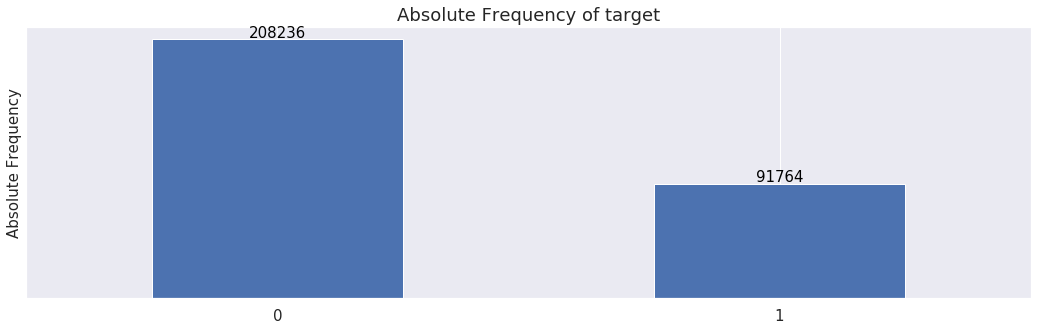

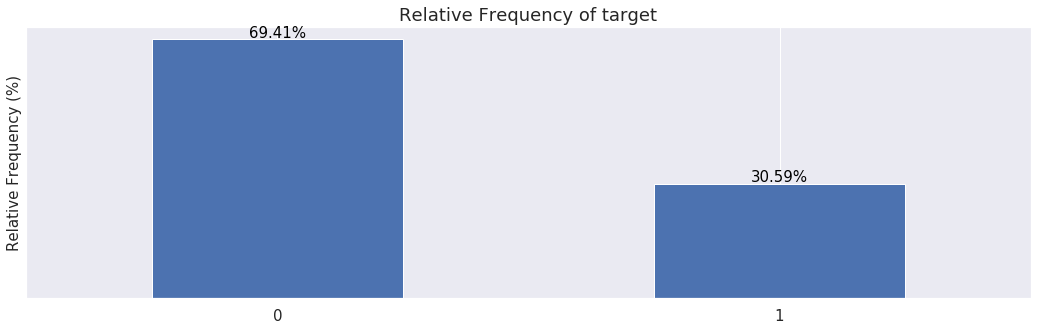

In [9]:
'''Plot and count the target variable in absolute and relative scale'''
absolute_and_relative_freq(train.target)

**We can see that target variable is a binary and It's seems that balanced in the ratio of 7:3 approximately.**

# 4. Distribution of categorical variables.

In [10]:
'''#4.Create a function that relative frequency of Target variable by a categorical variable. And then plots the relative frequency of target by a categorical variable.'''
def crosstab(cat, cat_target, color):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax1
    fig_size = (18, 5)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
       
    # Plot relative frequrncy of Target by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = color, title = 'Percentage Count of target by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()

## 4.1 Binary Features

**Percentage Count of target by bin_0:**

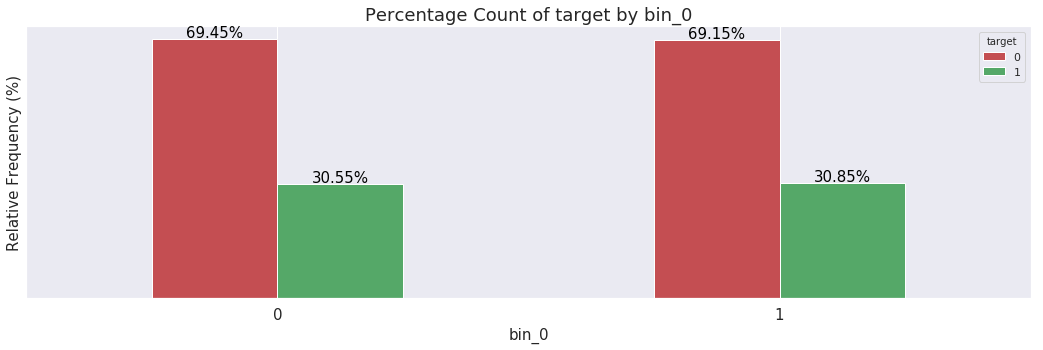

**Percentage Count of target by bin_1:**

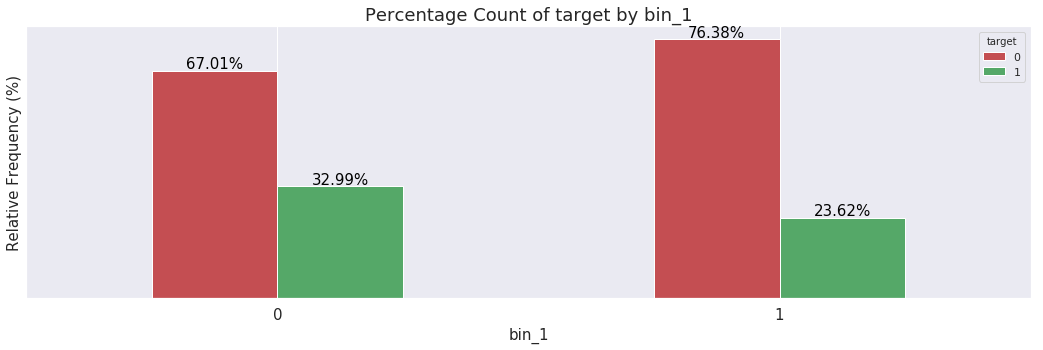

**Percentage Count of target by bin_2:**

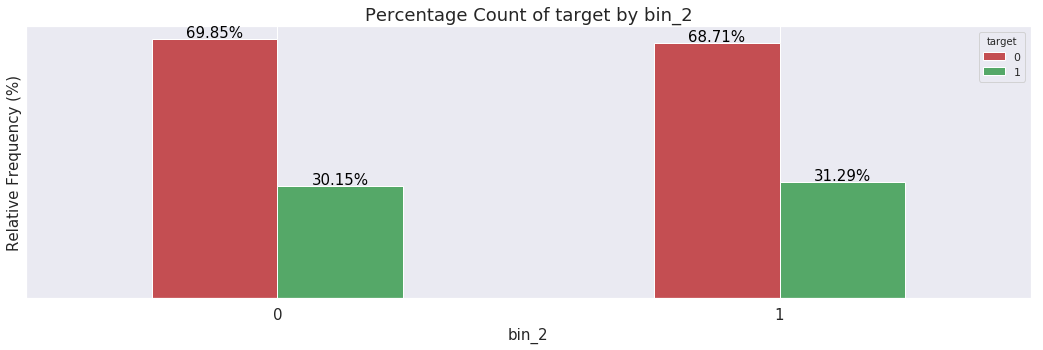

**Percentage Count of target by bin_3:**

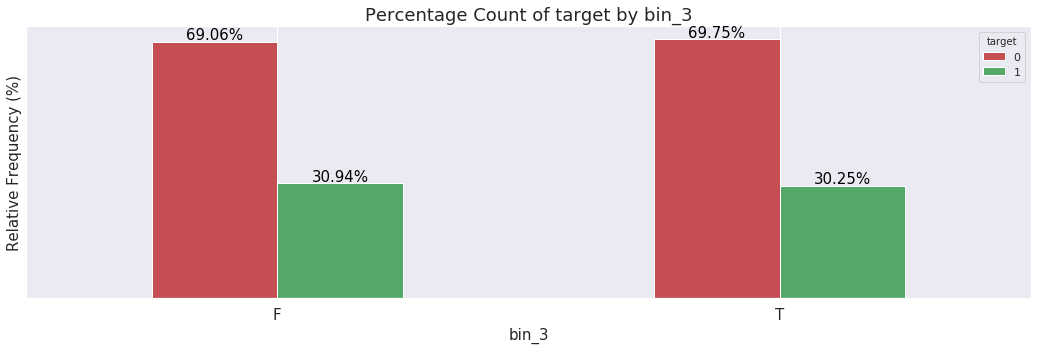

**Percentage Count of target by bin_4:**

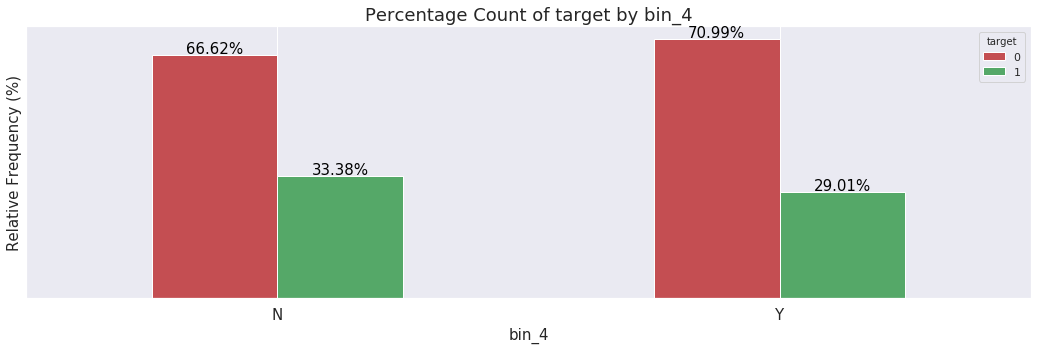

In [11]:
'''Plot the binary variables in relative scale'''

bold('**Percentage Count of target by bin_0:**')
crosstab(train.bin_0, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_1:**')
crosstab(train.bin_1, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_2:**')
crosstab(train.bin_2, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_3:**')
crosstab(train.bin_3, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_4:**')
crosstab(train.bin_4, train.target, color = ['r', 'g'])

## 4.2 Nominal variables

**Percentage Count of target by nom_0:**

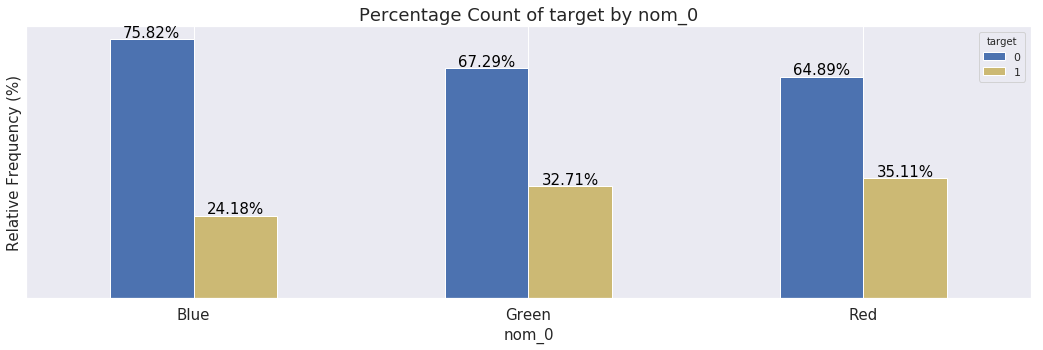

**Percentage Count of target by nom_1:**

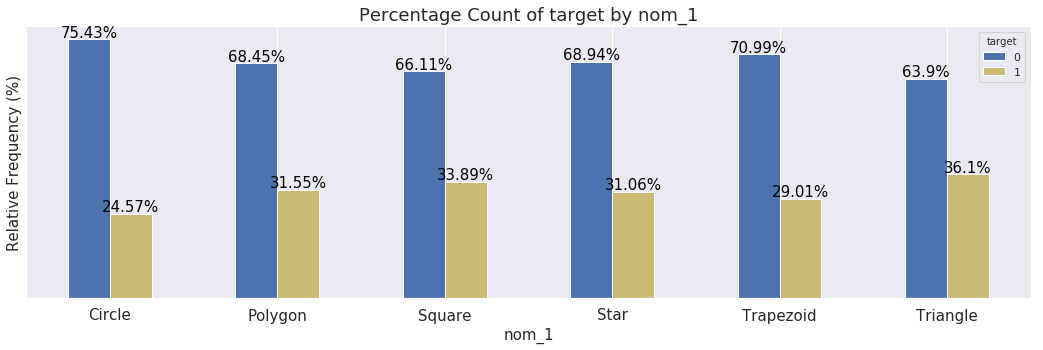

**Percentage Count of target by nom_2:**

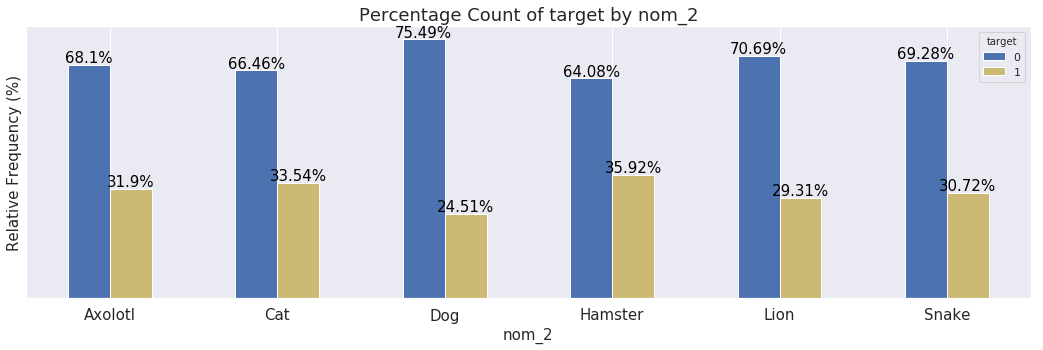

**Percentage Count of target by nom_3:**

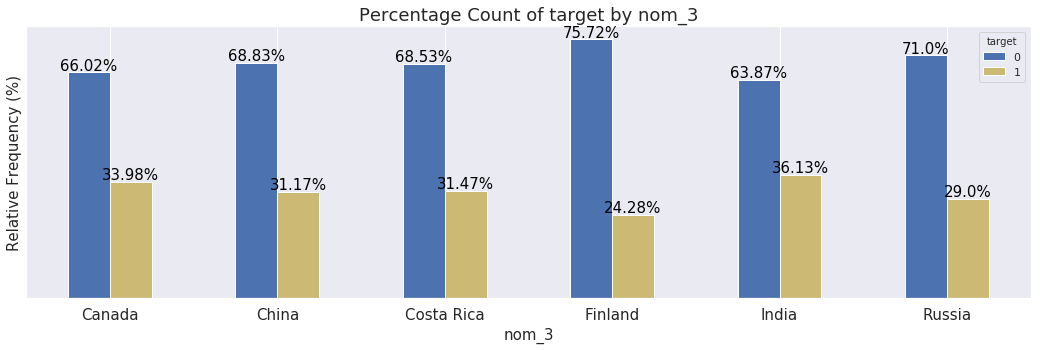

**Percentage Count of target by nom_4:**

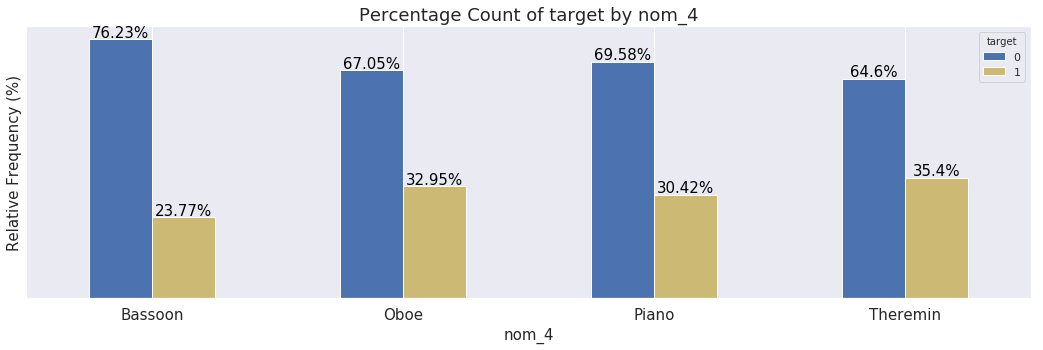

In [12]:
'''Plot the nominal variables in relative scale'''

bold('**Percentage Count of target by nom_0:**')
crosstab(train.nom_0, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_1:**')
crosstab(train.nom_1, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_2:**')
crosstab(train.nom_2, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_3:**')
crosstab(train.nom_3, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_4:**')
crosstab(train.nom_4, train.target, color = ['b', 'y'])

## 4.3. Ordinal Variable

**Percentage Count of target by ord_0:**

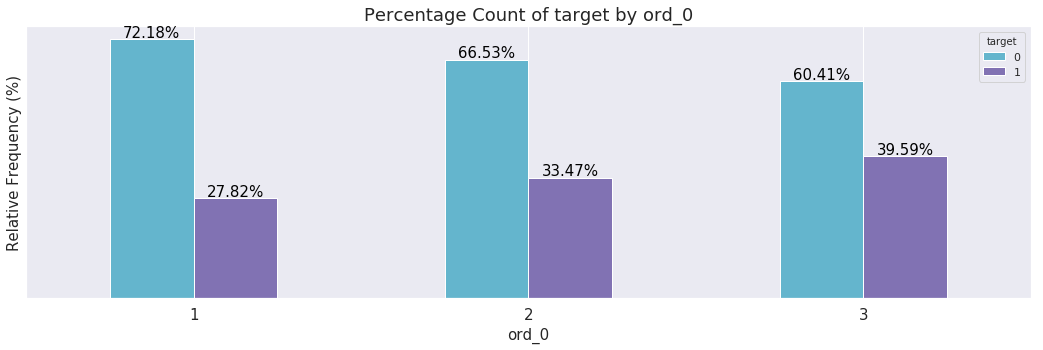

**Percentage Count of target by ord_1:**

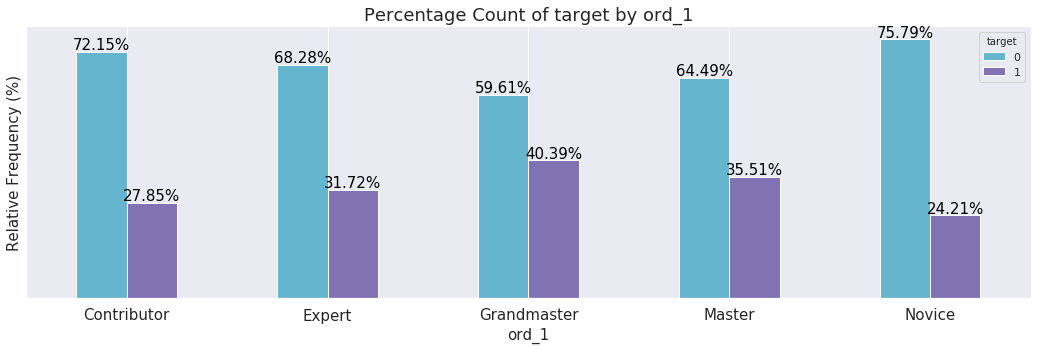

**Percentage Count of target by ord_2:**

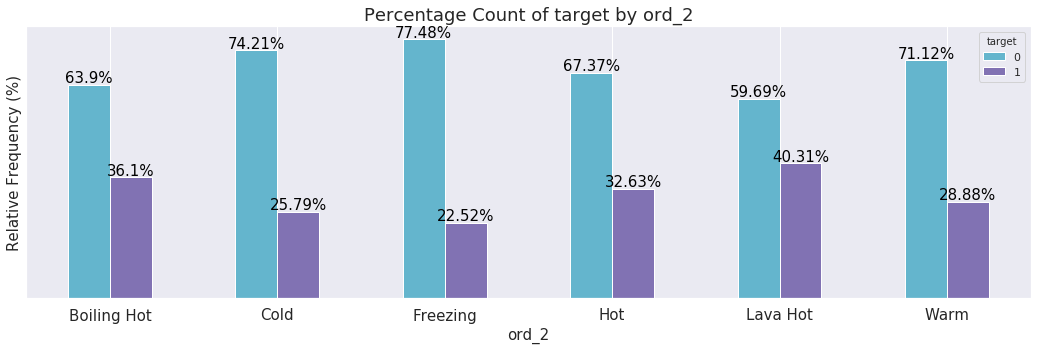

**Percentage Count of target by ord_3:**

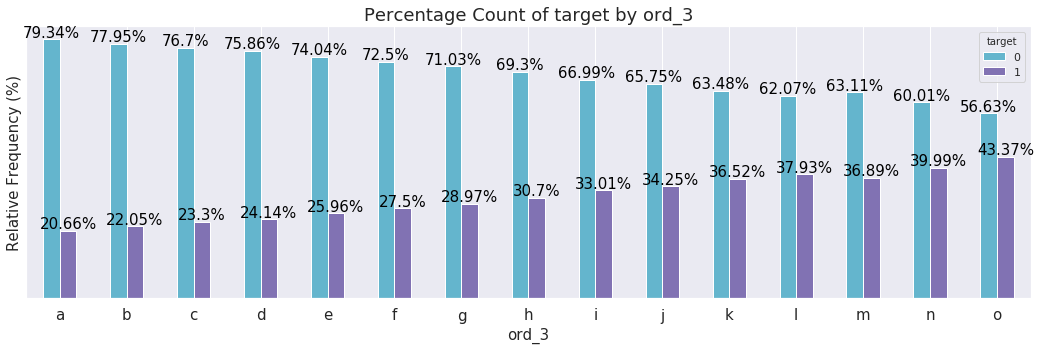

In [13]:
'''Plot the Ordinal variables in relative scale'''

bold('**Percentage Count of target by ord_0:**')
crosstab(train.ord_0, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_1:**')
crosstab(train.ord_1, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_2:**')
crosstab(train.ord_2, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_3:**')
crosstab(train.ord_3, train.target, color = ['c', 'm'])

In [14]:
def crosstab(cat, cat_target, color):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax1
    fig_size = (28, 6)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
       
    # Plot relative frequrncy of target by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = color, title = 'Percentage Count of target by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()

**Percentage Count of target by ord_4:**

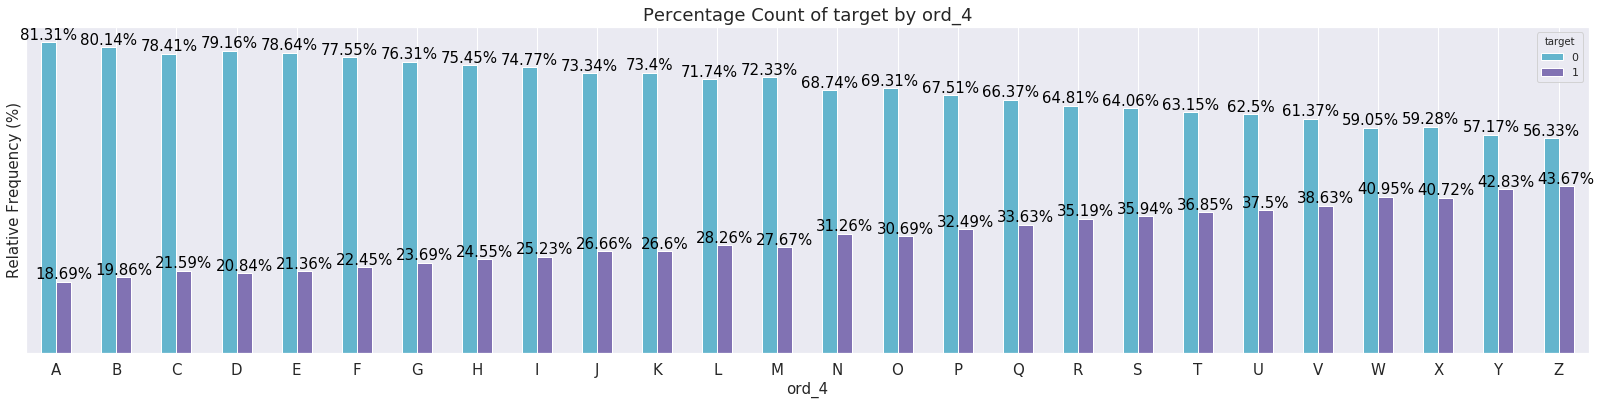

**Percentage Count of target by ord_5:**

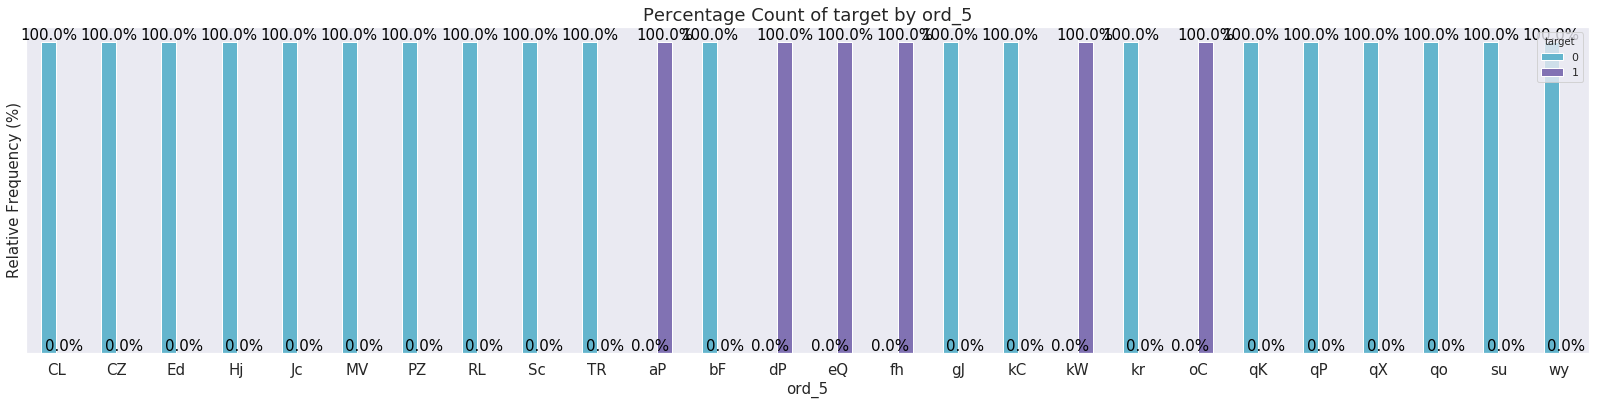

In [15]:
'''Plot the Ord_4 and ord_5 variables in relative scale'''
bold('**Percentage Count of target by ord_4:**')
crosstab(train.ord_4, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_5:**')
crosstab(train['ord_5'].head(26), train.target, color = ['c', 'm'])

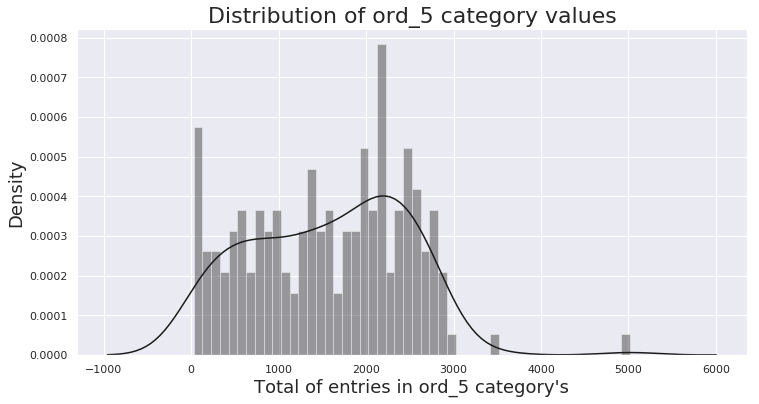

In [16]:
'''Distribution plot of ord_5'''
ord_5_count = train['ord_5'].value_counts().reset_index()['ord_5'].values
plt.figure(figsize=(12,6))

ax = sns.distplot(ord_5_count, bins= 50, color = 'k')
ax.set_title("Distribution of ord_5 category values", fontsize=22)
ax.set_xlabel("Total of entries in ord_5 category's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)

plt.show()

**It's seems that ord_5 is normally distributed.**

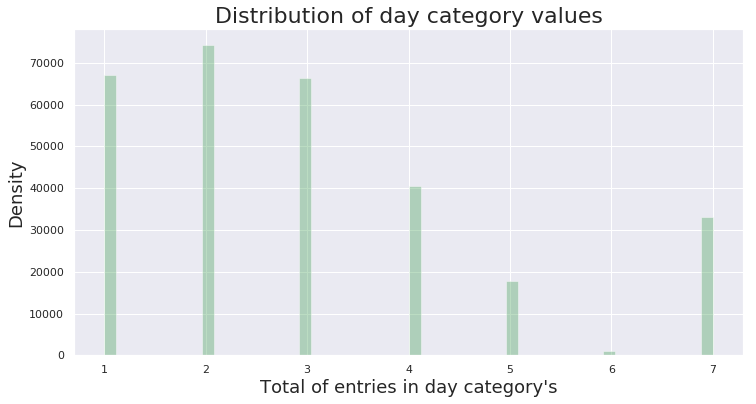

In [17]:
'''Distribution plot of day'''
plt.figure(figsize=(12,6))

ax = sns.distplot(train.day, color = 'g', kde = False)
ax.set_title("Distribution of day category values", fontsize=22)
ax.set_xlabel("Total of entries in day category's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)

plt.show()

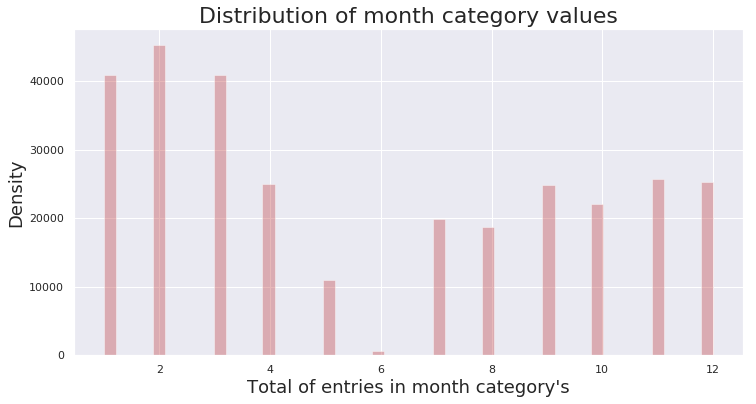

In [18]:
'''Distribution plot of month'''
plt.figure(figsize=(12,6))

ax = sns.distplot(train.month, color = 'r', kde = False)
ax.set_title("Distribution of month category values", fontsize=22)
ax.set_xlabel("Total of entries in month category's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)

plt.show()

# 5. Feature Engineering 

## 5.1 Binary Encoding - Binary Features

A binary variable is a variable with only two values. For example:
* 1 / 0.
* Yes / No.
* Success / Failure.
* Male / Female.
* Black / White

For machine learning models, we need numerical feature. so, we convert bin_3 and bin_4 in 1 and 0 form. In Binary Encoding — convert each integer to binary digits. Each binary digit gets one column. Some info loss but fewer dimensions.

In [19]:
'''Binary encoding of bin_3 and bin_4 of train data and test data'''
train['bin_3'] = train['bin_3'].apply(lambda x: 0 if x == 'F' else 1)
train['bin_4'] = train['bin_4'].apply(lambda x: 0 if x == 'N' else 1)

test['bin_3'] = test['bin_3'].apply(lambda x: 0 if x == 'F' else 1)
test['bin_4'] = test['bin_4'].apply(lambda x: 0 if x == 'N' else 1)

## 5.2 One Hot Encoding - Nominal Features
Nominal variables contain two or more categories without a natural ordering of the categories. For variable likes nom_0, nom_1, nom_2, nom_3, nom_4 we using One Hot Encoding. 

Categorical variables without any inherent order will be converted into numerical for our model using pandas get_dummies method.

In [20]:
'''Now extract the nominal variables for one hot encoding of train and test data.'''
one_hot_train = pd.get_dummies(train[['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']], drop_first = True)

one_hot_test = pd.get_dummies(test[['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']], drop_first = True)

'''Droping the variables'''
train.drop(['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'], axis=1, inplace=True)
test.drop(['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'], axis=1, inplace=True)

In [21]:
#'''Using sklearn bulit funtion for One Hot encoding'''
#from sklearn.preprocessing import OneHotEncoder

#for f in ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']:
#    if train[f].dtype == 'object' or test[f].dtype == 'object':
#        ohe = OneHotEncoder()
#        ohe.fit(train[f].values.reshape(-1, 1)) #fiting the data
#        ohe_train = ohe.transform(train[f].values.reshape(-1, 1)) #transforming the data
#        ohe_train = pd.DataFrame(ohe_train.toarray()) #convert sparse matrix to dataframe
#        
#        ohe.fit(test[f].values.reshape(-1, 1))
#        ohe_test = ohe.transform(test[f].values.reshape(-1, 1))
#        ohe_test = pd.DataFrame(ohe_test.toarray())
        

## 5.3 Feature Hashing
### Nominal Features: High Cardinality Features

Implementing feature hashing, aka the hashing trick on Variables like nom_5, nom_6, nom_7, nom_8, nom_9 due to High Cardinality Features.

Feature hashing is a very cool technique to represent categories in a “one hot encoding style” as a sparse matrix but with a much lower dimensions. In feature hashing we apply a hashing function to the category and then represent it by its indices. 

In [22]:
#'''Using sklearn's FeatureHasher to encode High Cardinality Features'''
#from sklearn.feature_extraction import FeatureHasher
#for f in ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']:
#    if train[f].dtype == 'object' or test[f].dtype == 'object':
#        h = FeatureHasher(input_type='string', n_features=1000)
#        h.fit(train[f].values) #fiting the data
#        hash_train = h.transform(train[f].values) #transforming the data
#        hash_train = pd.DataFrame(hash_train.toarray()) #convert sparse matrix to dataframe
        
#        h.fit(test[f].values) #fiting the data
#       hash_test = h.transform(test[f].values) #transforming the data
#       hash_test = pd.DataFrame(hash_test.toarray())

In [23]:
#'''Another hashing trick'''
#I got this solution from @kabure and @Giba
#high_card = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
#for col in high_card:
#    train[f'hash_{col}'] = train[col].apply( lambda x: hash(str(x)) % 5000 )
#    test[f'hash_{col}'] = test[col].apply( lambda x: hash(str(x)) % 5000 )  

## 5.4 Encoding with the Frequency
### Nominal Features: High Cardinality Features

In [24]:
high_card = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'] 
for col in high_card:
    enc_nom_1 = (train.groupby(col).size()) / len(train)
    train[f'freq_{col}'] = train[col].apply(lambda x : enc_nom_1[x])
    enc_nom_2 = (test.groupby(col).size()) / len(test)
    test[f'freq_{col}'] = test[col].apply(lambda x : enc_nom_2[x])

    '''Droping the variables'''
train.drop(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1, inplace=True)
test.drop(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1, inplace=True)

## 5.4 Label Encoding
### Nominal Features: High Cardinality Features
we use sklearn's label encoder method, it will randomly encode variables. Variables like nom_5, nom_6, nom_7, nom_8, nom_9, ord_5.


In [25]:
#from sklearn.preprocessing import LabelEncoder

#for f in ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']:
#    if train[f].dtype=='object' or test[f].dtype=='object': 
#        lbl = LabelEncoder()
#        lbl.fit(list(train[f].values) + list(test[f].values))
#        train[f'le_{f}'] = lbl.transform(list(train[f].values))
#        test[f'le_{f}'] = lbl.transform(list(test[f].values))

**I will keep only the frequency encoding to evaluate the results.**

**Feel free to change if you would;**

## 5.5 Ordinal Encoding 
### Ordinal Feature
Then, we will use pandas replace method to manually encode ordninal variables, because we don't want to be lost ordinality. Variables are ord_1, ord_2, ord_3, ord_4. ord_0 contains numerical values so we do not need to encode it again.


In [26]:
"""let's begin the manual process of ordinal encoding."""
# ordinal encoding on train data
train.ord_1.replace(to_replace = ['Novice', 'Contributor','Expert', 'Master', 'Grandmaster'],
                         value = [0, 1, 2, 3, 4], inplace = True)

train.ord_2.replace(to_replace = ['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot'],
                         value = [0, 1, 2, 3, 4, 5], inplace = True)

train.ord_3.replace(to_replace = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)

train.ord_4.replace(to_replace = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 
                                     'P', 'Q', 'R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                                  22, 23, 24, 25], inplace = True)

# ordinal encoding on test data
test.ord_1.replace(to_replace = ['Novice', 'Contributor','Expert', 'Master', 'Grandmaster'],
                         value = [0, 1, 2, 3, 4], inplace = True)

test.ord_2.replace(to_replace = ['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot'],
                         value = [0, 1, 2, 3, 4, 5], inplace = True)

test.ord_3.replace(to_replace = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)

test.ord_4.replace(to_replace = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 
                                       'P', 'Q', 'R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                                  22, 23, 24, 25], inplace = True)

### Ordinal Feature :High Cardinality Features

In [27]:
#'''Using sklearn's OrdinalEncoder to encode High Cardinality Features'''
#from sklearn.preprocessing import OrdinalEncoder
#oe = OrdinalEncoder(categories='auto')
#oe.fit(train.ord_5.values.reshape(-1, 1))
#train.ord_5 = oe.transform(train.ord_5.values.reshape(-1, 1))
#test.ord_5 = oe.transform(test.ord_5.values.reshape(-1, 1))

In [28]:
'''Then encode 'ord_5' using ACSII values'''
# Source:- https://www.kaggle.com/c/cat-in-the-dat/discussion/105702#latest-607652

'''Option 1: Add up the indices of two letters in string.ascii_letters'''
# train['ord_5_oe_add'] = train['ord_5'].apply(lambda x:sum([(string.ascii_letters.find(letter)+1) for letter in x]))
# test['ord_5_oe_add'] = test['ord_5'].apply(lambda x:sum([(string.ascii_letters.find(letter)+1) for letter in x]))

'''Option 2: Join the indices of two letters in string.ascii_letters'''
#train['ord_5_oe_join'] = train['ord_5'].apply(lambda x:float(''.join(str(string.ascii_letters.find(letter)+1) for letter in x)))
# test['ord_5_oe_join'] = test['ord_5'].apply(lambda x:float(''.join(str(string.ascii_letters.find(letter)+1) for letter in x)))

'''Option 3: Split 'ord_5' into two new columns using the indices of two letters in string.ascii_letters, separately'''
train['ord_5_oe1'] = train['ord_5'].apply(lambda x:(string.ascii_letters.find(x[0])+1))
test['ord_5_oe1'] = test['ord_5'].apply(lambda x:(string.ascii_letters.find(x[0])+1))

train['ord_5_oe2'] = train['ord_5'].apply(lambda x:(string.ascii_letters.find(x[1])+1))
test['ord_5_oe2'] = test['ord_5'].apply(lambda x:(string.ascii_letters.find(x[1])+1))

'''Option 4: Simply sort their values by string of ord_5'''
ord_5 = sorted(list(set(train['ord_5'].values)))
ord_5 = dict(zip(ord_5, range(len(ord_5))))
train.loc[:, 'ord_5'] = train['ord_5'].apply(lambda x: ord_5[x]).astype(float)
test.loc[:, 'ord_5'] = test['ord_5'].apply(lambda x: ord_5[x]).astype(float)

## 5.5 Encoding cyclic features
Encoding cyclical continuous features - 24-hour time. Some data is inherently cyclical. Time is a rich example of this: minutes, hours, seconds, day of week, week of month, month, season, and so on all follow cycles.

In [29]:
'''Transfer the cyclical features into two dimensional sin-cos features'''
# source:  https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning
def cyclical_encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

train = cyclical_encode(train, 'day', 7)
test = cyclical_encode(test, 'day', 7) 

train = cyclical_encode(train, 'month', 12)
test = cyclical_encode(test, 'month', 12)

# Seting X and Y

In [30]:
'''Transfer the dtypes of encoded ordinal features into float64'''
for col in ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5_oe1', 'ord_5_oe2', 'ord_5']:
    train[col]= train[col].astype('float64')
    test[col]= test[col].astype('float64')

In [31]:
"""Let's concate one hot encoded, cyclic encoded variables together."""
train_processed = pd.concat([one_hot_train, train], axis = 1)
test_processed = pd.concat([one_hot_test, test], axis = 1)

In [32]:

"""Let's look at our final train and test data for modelling."""
bold('**Updated train data for modelling:**')
display(train_processed.head(3))
bold('**Updated test data for modelling:**')
display(test_processed.head(3))

**Updated train data for modelling:**

,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,...,freq_nom_6,freq_nom_7,freq_nom_8,freq_nom_9,ord_5_oe1,ord_5_oe2,day_sin,day_cos,month_sin,month_cos
0,1,0,0,0,0,0,1,0,0,0,...,0.003827,0.000803,0.000903,0.000063,11.0,18.0,9.749279e-01,-0.222521,0.866025,0.5
1,1,0,0,0,0,1,0,0,0,1,...,0.002807,0.000957,0.000370,0.000043,2.0,32.0,-2.449294e-16,1.000000,-0.866025,-0.5
2,0,0,0,0,0,1,0,0,0,0,...,0.003897,0.001583,0.000927,0.000097,36.0,3.0,-2.449294e-16,1.000000,0.866025,0.5


**Updated test data for modelling:**

,nom_0_Green,nom_0_Red,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Cat,nom_2_Dog,nom_2_Hamster,...,freq_nom_6,freq_nom_7,freq_nom_8,freq_nom_9,ord_5_oe1,ord_5_oe2,day_sin,day_cos,month_sin,month_cos
0,0,0,0,0,0,0,1,0,0,0,...,0.003025,0.001145,0.000565,0.000070,2.0,5.0,-9.749279e-01,-0.222521,-5.000000e-01,0.866025
1,0,1,0,1,0,0,0,0,0,0,...,0.003035,0.001625,0.000860,0.000125,44.0,42.0,-2.449294e-16,1.000000,5.000000e-01,-0.866025
2,0,0,0,1,0,0,0,0,1,0,...,0.003860,0.000760,0.000975,0.000050,20.0,42.0,7.818315e-01,0.623490,-2.449294e-16,1.000000


In [33]:
'''Function to reduce the DF size'''
# source: https://www.kaggle.com/kernels/scriptcontent/3684066/download

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [34]:
train_processed = reduce_mem_usage(train_processed)
test_processed = reduce_mem_usage(test_processed)

Memory usage of dataframe is 65.23 MB
Memory usage after optimization is: 24.60 MB
Decreased by 62.3%
Memory usage of dataframe is 41.96 MB
Memory usage after optimization is: 16.21 MB
Decreased by 61.4%


In [35]:
'''Seting X and Y'''
X_train = train_processed.drop(['id', 'target'],axis = 1)
y_train = train_processed['target']
X_test = test_processed.drop(['id'], axis = 1)


In [36]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', X_train.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', X_test.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (300000, 44)
Output vector dimension: (300000,)
Test data dimension: (200000, 44)


# 6. Model Building & Evaluation 
With all the preprocessings done and dusted, we're ready to train our regression models with the processed data.**

## 6.1 Importing Libraries

In [37]:
'''Importing the auxiliar and preprocessing librarys'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

## 6.2 Creating Pipeline and Evaluation Models

#### Standardization

Numerical features preprocessing is different for tree and non tree model.

1) Usually:
   * Tree based models does not depend on scaling
   * Non-tree based models hugely depend on scaling

2) Most Often used preprocening are:
    * MinMax scaler to (0,1)
    It can formulated as
    x <- (x - min(x)) / (max(x) - min(x))
    
    * Standard Scaler to mean = 0 and std =1
    It can formulated as
    x <- (x - mean(x)) / sd(x)

In [38]:
'''Spot-Check Algorithms'''
def GetBasedModel():
    basedModels = []
    
    basedModels.append(('LR',
                        Pipeline([('Scaler', StandardScaler()), 
                                   ('LR', LogisticRegression())])))
    basedModels.append(('RC',
                        Pipeline([('Scaler', StandardScaler()),
                                   ('RC', RidgeClassifier())])))
    basedModels.append(('LDA', 
                        Pipeline([('Scaler', StandardScaler()),
                                   ('LDA', LinearDiscriminantAnalysis())])))
    #basedModels.append(('KNN'  , KNeighborsClassifier()))
    #basedModels.append(('DT' , DecisionTreeClassifier()))
    #basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    basedModels.append(('XGB'   , XGBClassifier()))
    
    return basedModels


'''Test options and evaluation metric'''
def BasedLine(X_train, y_train, models):
    num_folds = 7
    scoring = 'accuracy'

    results, names = [], []

    for name, model in models:
        kfold = StratifiedKFold(n_splits = num_folds, random_state = 44)
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, 
                                scoring = scoring, n_jobs = -1)
        names.append(name)
        results.append(cv_results)
        msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                                   cv_results.std())
        print(msg)
    
    return names, results
    
    
'''Visualization of results'''
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [39]:
models = GetBasedModel()
names,results = BasedLine(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.744670 (+/- 0.002599)
RC: 0.743953 (+/- 0.002049)
LDA: 0.744423 (+/- 0.002449)
AB: 0.740723 (+/- 0.001593)
GBM: 0.737970 (+/- 0.001223)
RF: 0.710073 (+/- 0.001580)
ET: 0.709487 (+/- 0.001500)
XGB: 0.737820 (+/- 0.001438)


## 6.7 Optimizing Hyperparameters
Now let's add Grid Search to all the models with the hopes of optimizing their hyperparameters and thus improving their accuracy. Are the default model parameters the best bet? Let's find out.

Note: Though optimizing hyperparameters is time consuming, hyperparameters should be tuned for all the models you try because only then you will be able to tell what is the best you can get out of that particular model.

In [40]:
'''Create a function to tune hyperparameters of the selected models.'''
seed = 44
def grid_search_cv(model, params):
    global best_params, best_score
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 3,
                             scoring = 'accuracy', n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_params, best_score

#### Optimizing our best model performed

In [41]:
'''Define hyperparameters of Logistic Regression.'''
LR_model = LogisticRegression()

LR_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 2, 4, 8 ,10)}

grid_search_cv(LR_model, LR_params)
LR_best_params, LR_best_score = best_params, best_score
print('LR best params:{} & best_score:{:0.5f}' .format(LR_best_params, LR_best_score))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.0min finished


LR best params:{'C': 100.0, 'penalty': 'l1'} & best_score:0.74468


In [42]:
'''Define hyperparameters of Ridge Classifier.'''
RC_model = RidgeClassifier()

RC_params = {'alpha':[ 9, 9.2, 9.4, 9.5, 9.52, 9.54, 9.56, 9.58, 9.6, 9.62, 9.64, 9.66, 9.68, 9.7,  9.8],
             'random_state':[seed]}

grid_search_cv(RC_model, RC_params)
RC_best_params, RC_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(RC_best_params, RC_best_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   33.8s finished


Ridge best params:{'alpha': 9, 'random_state': 44} & best_score:0.74401


In [43]:
'''Define hyperparameters of Linear Discriminant Analysis.'''
LDA_model = LinearDiscriminantAnalysis()

LDA_params = {'solver': ['svd', 'lsqr', 'eigen'],
              }

grid_search_cv(LDA_model, LDA_params)
LDA_best_params, LDA_best_score = best_params, best_score
print('LDA best params:{} & best_score:{:0.5f}' .format(LDA_best_params, LDA_best_score))

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.6s finished


LDA best params:{'solver': 'svd'} & best_score:0.74436


In [44]:
'''Define hyperparameters of AdaBoostClassifier.'''
AB_model = AdaBoostClassifier()

AB_params = {'n_estimators': (50 , 100),
             'learning_rate': (1.0, 3.0),
             'algorithm': ['SAMME', 'SAMME.R']}

grid_search_cv(AB_model, AB_params)
AB_best_params, AB_best_score = best_params, best_score
print('AB best params:{} & best_score:{:0.5f}' .format(AB_best_params, AB_best_score))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 19.2min finished


AB best params:{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100} & best_score:0.74364


In [45]:
#'''Define hyperparameters of Gradient Boosting Classifier'''
#GBC_model = GradientBoostingClassifier()

#GBC_params = {'learning_rate': [0.02, 0.05, 0.1],
#              'max_depth': [4, 6],
#              'max_features': [1.0, 0.3], 
#              'min_samples_split': [ 2, 3],
#              'random_state':[seed]}

#grid_search_cv(GBC_model, GBC_params)
#GBC_best_params, GBC_best_score = best_params, best_score
#print('GBC best params:{} & best_score:{:0.5f}' .format(GBC_best_params, GBC_best_score))

**I am not optimizing XGBoost but you can try optimization on all the models for better score.**

**Note: Though optimizing hyperparameters is time consuming.**

In [46]:
#'''For XGBC, the following hyperparameters are usually tunned.'''
#'''https://xgboost.readthedocs.io/en/latest/parameter.html'''

#XGB_model = XGBClassifier(
#            n_estimators=500,
#            verbose = True)


#XGB_params = {'max_depth': (2, 5),
#               'reg_alpha':  (0.01, 0.4),
#               'reg_lambda': (0.01, 0.4),
#               'learning_rate': (0.1, 0.4),
#               'colsample_bytree': (0.3, 1),
#               'gamma': (0.01, 0.7),
#               'num_leaves': (2, 5),
#               'min_child_samples': (1, 5),
#              'subsample': [0.5, 0.8],
#              'random_state':[seed]}

#grid_search_cv(XGB_model, XGB_params)
#XGB_best_params, XGB_best_score = best_params, best_score
#print('XGB best params:{} & best_score:{:0.5f}' .format(XGB_best_params, XGB_best_score))

## 6.8 Retrain and Predict Using Optimized Hyperparameters

In [47]:
'''Instantiate the models with optimized hyperparameters.'''
lr = LogisticRegression(**LR_best_params)
rc = RidgeClassifier(**RC_best_params)
lda = LinearDiscriminantAnalysis(**LDA_best_params)
ab = AdaBoostClassifier(**AB_best_params)

In [48]:
'''Instantiate the models with optimized hyperparameters.'''
models = {'LR': lr, 'RC': rc, 'LDA': lda, 'AB': ab}

# 10-fold Cross Validation after Optimization
score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    items.fit(X_train, y_train)
    scores = cross_val_score(items, X_train, y_train, cv = 10, scoring = 'accuracy')
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

Mean Accuracy: 0.7446 (+/- 0.0022) [LR]
Mean Accuracy: 0.7440 (+/- 0.0017) [RC]
Mean Accuracy: 0.7444 (+/- 0.0023) [LDA]
Mean Accuracy: 0.7436 (+/- 0.0022) [AB]


In [49]:
'''Submission with the most accurate logistic regression'''
submission = pd.DataFrame({'id': test['id'],
                           'target': lr.predict_proba(X_test)[:,1] })
submission.to_csv('submission_lr.csv', index = False)

'''Submission with the most accurate Ridge Classifier'''
submission  = pd.DataFrame({'id': test['id'],
                            'target': rc.predict(X_test)})
submission.to_csv('submission_rc.csv', index = False)

'''Submission with the most accurate Linear Discriminant Analysis'''
submission  = pd.DataFrame({'id': test['id'],
                            'target': lda.predict(X_test)})
submission.to_csv('submission_lda.csv', index = False)

'''Submission with the most accurate AdaBoostClassifier'''
submission  = pd.DataFrame({'id': test['id'],
                            'target': ab.predict(X_test)})
submission.to_csv('submission_ab.csv', index = False)

# ***<font color="green">Give me your feedback and if you find  my kernel helpful please <b>UPVOTE will be appreciated.</b> <br></font>***
# --Thank You for Reading